Importing the necessary libraries

In [ ]:
import numpy as np #Linear algebra
import pandas as pd #data processing to read_csv file
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for statistical data visualization
import tensorflow as tf #for deep learning algorithm
from sklearn.preprocessing import StandardScaler #for standardization
from sklearn.model_selection import train_test_split #to split the variable

In [ ]:
# using pandas read_csv to upload the downloaded data
Bcc_dataset = pd.read_csv("dataR2.csv")

Exploratoty Data Analysis

In [ ]:
#Preview the dataset
Bcc_dataset.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
#Summary of the dataset to check data types
Bcc_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP1            116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [ ]:
#Statistical analysis of numerical variables
Bcc_dataset.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [ ]:
Bcc_dataset.tail()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP1,Classification
111,45,26.85,92,3.33,0.755688,54.68,12.10,10.96,268.23,2
112,62,26.84,100,4.53,1.117400,12.45,21.42,7.32,330.16,2
113,65,32.05,97,5.73,1.370998,61.48,22.54,10.33,314.05,2
114,72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46,2
115,86,27.18,138,19.91,6.777364,90.28,14.11,4.35,90.09,2


In [ ]:
#Checking for null values
Bcc_dataset.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP1              0
Classification    0
dtype: int64

In [ ]:
#Checking for duplicates
Bcc_dataset.duplicated().sum()

0

In [ ]:
Bcc_dataset.shape

(116, 10)

In [ ]:
#Count for all variables
Bcc_dataset.count()

Age               116
BMI               116
Glucose           116
Insulin           116
HOMA              116
Leptin            116
Adiponectin       116
Resistin          116
MCP1              116
Classification    116
dtype: int64

In [ ]:
Bcc_dataset['Classification'].value_counts()

2    64
1    52
Name: Classification, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


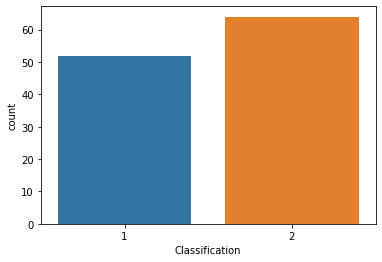

In [ ]:
#Visualization for value counts of dependent variable
sns.countplot(Bcc_dataset['Classification'])

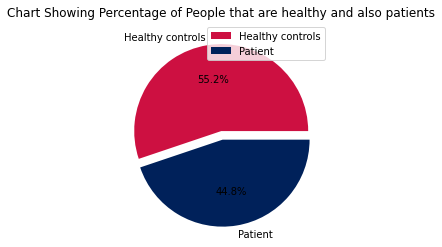

In [ ]:
#Pie chart showing the percentage of healthy controls and patients contained in the dataset
Class_List = Bcc_dataset.Classification.value_counts()
Class_List

plt.pie(Class_List, labels = ["Healthy controls", "Patient"], 
        explode=[0.0, 0.1], 
        colors = ['#cd1041', '#00215a'],
        autopct='%1.1f%%'
       )
plt.title('Chart Showing Percentage of People that are healthy and also patients')
plt.legend()
plt.show()

In [ ]:
#Splitting the dataset into train and test sets
x = Bcc_dataset.drop('Classification',axis = 1)
y = Bcc_dataset['Classification'] - 1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y, random_state = 0)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#implementing the Keras model to be used for this analysis
bcc_model = tf.keras.models.Sequential()

bcc_model.add(tf.keras.layers.Dense(30, activation='relu', input_shape=(9,))) #Input Layer
bcc_model.add(tf.keras.layers.Dense(2,activation='sigmoid')) 

In [ ]:
#Setting the necessary parameters
bcc_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

In [ ]:
#summary of the model
bcc_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                300       
                                                                 
 dense_1 (Dense)             (None, 2)                 62        
                                                                 
Total params: 362
Trainable params: 362
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Using a For Loop to determine values for batch_size and epoch
class_weights = {0:1.115, 1:0.906}
TrialNumber=0
batch_size_list=[5, 10, 20, 25, 30, 40, 50, 70]
epoch_list=[5, 10, 20, 50, 70, 100]

for batch in batch_size_list:
  for epoch in epoch_list:
    TrialNumber+=1
    history = bcc_model.fit(x_train, y_train, \
                    batch_size = batch, epochs = epoch, \
                    verbose = 2, class_weight=class_weights, \
                    validation_split = 0.2)
    Accuracy = history.history['accuracy'][-1]    

    print(TrialNumber, 'Parameters:','batch_size:', batch,'-', 'epochs:',epoch, 'Accuracy:', Accuracy)

Epoch 1/5
14/14 - 3s - loss: 0.7993 - accuracy: 0.4348 - val_loss: 0.6022 - val_accuracy: 0.7778 - 3s/epoch - 186ms/step
Epoch 2/5
14/14 - 0s - loss: 0.7567 - accuracy: 0.4638 - val_loss: 0.5889 - val_accuracy: 0.7778 - 51ms/epoch - 4ms/step
Epoch 3/5
14/14 - 0s - loss: 0.7308 - accuracy: 0.5217 - val_loss: 0.5850 - val_accuracy: 0.7222 - 65ms/epoch - 5ms/step
Epoch 4/5
14/14 - 0s - loss: 0.7038 - accuracy: 0.5797 - val_loss: 0.5827 - val_accuracy: 0.7778 - 48ms/epoch - 3ms/step
Epoch 5/5
14/14 - 0s - loss: 0.6826 - accuracy: 0.5942 - val_loss: 0.5762 - val_accuracy: 0.7222 - 50ms/epoch - 4ms/step
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 0.5942028760910034
Epoch 1/10
14/14 - 0s - loss: 0.6647 - accuracy: 0.6232 - val_loss: 0.5680 - val_accuracy: 0.7222 - 78ms/epoch - 6ms/step
Epoch 2/10
14/14 - 0s - loss: 0.6485 - accuracy: 0.6957 - val_loss: 0.5611 - val_accuracy: 0.7222 - 50ms/epoch - 4ms/step
Epoch 3/10
14/14 - 0s - loss: 0.6342 - accuracy: 0.6957 - val_loss: 0.5566 - val_a

In [ ]:
#scale my dataset
class_weights = {0:1.115, 1:0.906}


history = bcc_model.fit(x_train, y_train, \
                    batch_size =5, epochs = 70, \
                    verbose = 2, class_weight=class_weights, \
                    validation_data=(x_test ,y_test))

Epoch 1/70
18/18 - 0s - loss: 0.1862 - accuracy: 0.9540 - val_loss: 0.6070 - val_accuracy: 0.8966 - 96ms/epoch - 5ms/step
Epoch 2/70
18/18 - 0s - loss: 0.1041 - accuracy: 0.9540 - val_loss: 0.5716 - val_accuracy: 0.8966 - 76ms/epoch - 4ms/step
Epoch 3/70
18/18 - 0s - loss: 0.0717 - accuracy: 0.9770 - val_loss: 0.5907 - val_accuracy: 0.8621 - 66ms/epoch - 4ms/step
Epoch 4/70
18/18 - 0s - loss: 0.0720 - accuracy: 0.9540 - val_loss: 0.5709 - val_accuracy: 0.8966 - 70ms/epoch - 4ms/step
Epoch 5/70
18/18 - 0s - loss: 0.0542 - accuracy: 0.9770 - val_loss: 0.5603 - val_accuracy: 0.8966 - 63ms/epoch - 4ms/step
Epoch 6/70
18/18 - 0s - loss: 0.0516 - accuracy: 0.9770 - val_loss: 0.5758 - val_accuracy: 0.8966 - 64ms/epoch - 4ms/step
Epoch 7/70
18/18 - 0s - loss: 0.0414 - accuracy: 0.9885 - val_loss: 0.5631 - val_accuracy: 0.8966 - 72ms/epoch - 4ms/step
Epoch 8/70
18/18 - 0s - loss: 0.0381 - accuracy: 0.9885 - val_loss: 0.5625 - val_accuracy: 0.8966 - 72ms/epoch - 4ms/step
Epoch 9/70
18/18 - 0s - 

In [ ]:
#Using sklearn to evaluate my result
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
y_pred = bcc_model.predict(x_test)
y_pred = y_pred.argmax(axis=1)

1/1 [==============================] - 0s 72ms/step


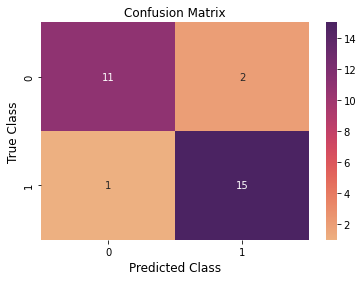

In [ ]:
#Visualizing my final output to evaluate performance result
confusion_matrix = confusion_matrix(y_test,y_pred)

ax = sns.heatmap(confusion_matrix, cmap='flare', annot = True, fmt='d')

plt.xlabel('Predicted Class',fontsize = 12)
plt.ylabel('True Class',fontsize = 12)
plt.title('Confusion Matrix',fontsize = 12)

plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.88      0.94      0.91        16

    accuracy                           0.90        29
   macro avg       0.90      0.89      0.89        29
weighted avg       0.90      0.90      0.90        29



In [ ]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1])

Text(0.5, 1.0, 'Loss Curves')

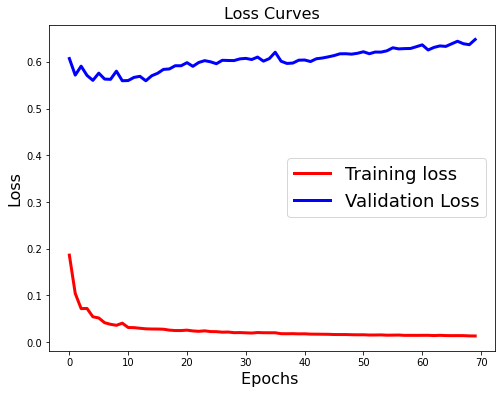

In [ ]:
#Plot the Graph
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

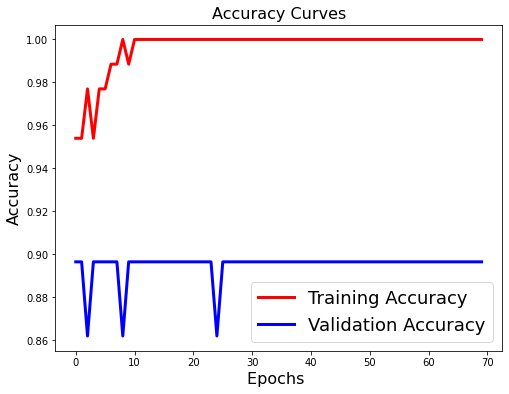

In [ ]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)